## Deutsch’s Algorithm
The author is David Amankwah (G00394825@atu.ie).

This notebook will explore the Deutsch’s Algorithm.

## Introduction
Quantum computing is a rapidly-emerging technology that harnesses the laws of quantum mechanics to solve problems too complex for classical computers [1].
One of the first examples of a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm is the Deutsch algorithm [2]. In this project I will explain the concept and implementation of Deutsch's algorithm using quantum circuits with Qiskit. I will also use ChatGPT (conversational model) to generate code snippets and provide comments and explanations. I will first give an overview of quantum computing.



## Overview of Quantum Computing
Quantum computing is a technology that uses the principles of quantum physics to perform calculations that are beyond the reach of classical computers [1]. Quantum computers use subatomic particles such as electrons or photons as the basic units of information, called qubits. Qubits can exist in two states at the same time, called superposition, and can interact with each other through a phenomenon called entanglement. These quantum properties allow quantum computers to explore multiple solutions simultaneously and find the best solution faster than classical computers [5].

The image below shows a single atom or ion stuck in an optical cavity. There is a gap between the mirrors that is controlled by specific pulses of the laser beam. The laser beams is a possible way of containing atoms and changing their states  [7].

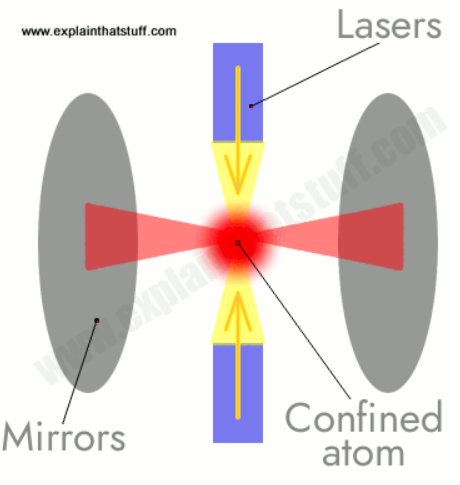

Quantum computing has a lot of potential applications in many of fields, including cryptography, artificial intelligence, bio engineering, finance services, and physics [6]. Some of the problems that quantum computers can solve include breaking encryption schemes, simulating complex molecules, optimizing combinations, and discovering new particles. However, quantum computing also faces various challenges, such as maintaining qubit consistency, correcting errors, expanding the number of qubits, and designing efficient algorithms [5].

Quantum computing has come a long way, but the entire field is still in its infancy. Most studies agree that we may not see practical quantum computers for decades [7]. Research efforts will allow quantum computers to continue to evolve.



## What is Deutsch's algorithm 

Deutsch's algorithm is a quantum algorithm developed by David Deutsch in 1985 with improvements by Richard Jozsa in 1992. The algorithm was made to be simple and speed up search. It is unlike any other classical algorithm. The algorithm checks whether or not a function has a certain property. Deutsch's algorithm involves determining whether a binary function is constant or balanced [2]. The Deutsch algorithm has become an important part of quantum computing because it outperforms classical algorithms in certain aspects. The algorithm is able to determine whether a binary function is constant or balanced, it also manages to speed up searches and ensure simplicity and efficiency. This has paved the way for further advancements in the future of quantum computing.

The Deutsch problem is difficult for deterministic algorithms. This is a black-box problem that a quantum computer can solve without errors, while a classical computer needs many black-box queries to find a solution to the problem [3]. Classical algortihm are deterministic algorithms that need multiple checks to see if a function is balanced or constant, while Deutsch needs only one query.

The Deutsch algorithm is a notable part of quantum computing, as it makes a clear distinction between the quantum and classical domains. The constant functions have the same output for all inputs, and the balanced functions returns a 0 output for half of the inputs and a 1 output for the other half [4].







## Quantum Circuit

Quantum circuits are a model for quantum computing, similar to classical circuits, where a computation is a series of quantum gates, measurements, initializations of qubits to known values, and possibly other actions [8]. The Quantum Logic Gates is a simple quantum circuit that works on a small number of qubits and the building blocks of quantum circuits. Quantum logic gates are reversible, and it is possible to perform classical computation using only reversible gates. Quantum logic gates are unitary operators, and are described as unitary matrices relative to some basis [9]. The Quantumn Circuit can be implemented using the Qiskit library in Python.




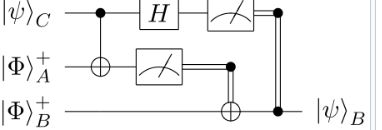

The image above shows a circuit made up of quantum gates and measurements. The measurement is a quantum phenomenon that does not occur in classical circuits [8]. 

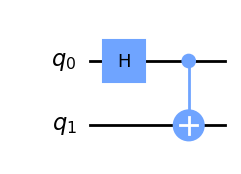

In [3]:
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Generates a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to create a superposition
qc.h(0)

# Apply a CNOT gate to create entanglement
qc.cx(0, 1)

# Visualize the circuit
qc.draw('mpl')


The code above creates a quantum circuit with two qubits. We apply a Hadamard gate to the first qubit, creating a superposition with 
qc.h(0). A CNOT gate that entangles the two qubits is implemented with qc.cx(0, 1). The code qc.draw('mpl') visualizes the quantum circuit using Matplotlib.

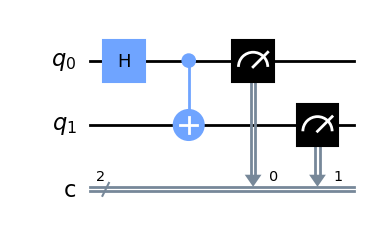

In [6]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply CNOT gate: Qubit 0 is the control, and Qubit 1 is the target
qc.cx(0, 1)

# Perform a measurement on both qubits
qc.measure([0, 1], [0, 1])

# Draw the quantum circuit
qc.draw('mpl')



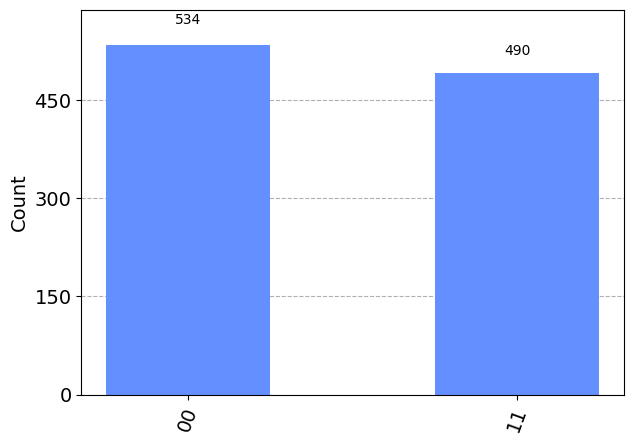

In [7]:
# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Get and plot the histogram of measurement outcomes
counts = result.get_counts()
plot_histogram(counts)

## Deutsch algorithm implemented using quantum circuits.

According to Jan Czechowski from Medium, a constant function has the same outputs, so if we consider the standard reversible representation of a quantum function: f(|x, y⟩) = |x, f(x)⊕ y⟩ we want f(x) to always be 0 or always be 1 [10].

In [3]:
from qiskit import QuantumCircuit, Aer, execute

def deutsch_algorithm():
    # Create a quantum circuit with two qubits
    qc = QuantumCircuit(2, 1)

    # Apply Hadamard gate to both qubits
    qc.h(0)
    qc.h(1)

    # Apply X and H gate to the second qubit to create the |1⟩ state
    qc.x(1)
    qc.h(1)

    # Apply the quantum oracle for a constant function
    qc.x(0)  # Applying X gate for a constant function
    qc.barrier()

    # Apply Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)

    # Get the result
    result = job.result()
    counts = result.get_counts()

    # Check if the measured state is |0⟩ or |1⟩
    return 'constant' if '0' in counts else 'balanced'

# Test the algorithm for a constant function
result_constant = deutsch_algorithm_constant()

print("Result for constant function:", result_constant)


Result for constant function: constant


The code above has a function create a quantum circuit for constant function. The X gate is applied to the first quibit. The function executes the deutsch algorithm and outputs the result. The  result , "Result for constant function: constant", diplays the function as a constant. 

## References
[1] https://www.ibm.com/topics/quantum-computing What is Quantum Computing? | IBM

[2] https://www.quantum-inspire.com/kbase/deutsch-jozsa-algorithm/. Code example: Deutsch-Jozsa algorithm | Quantum Inspire

[3] https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm. Deutsch–Jozsa algorithm | Wikipedia

[4] https://www.linkedin.com/pulse/quantum-computing-deutsch-jozsa-algorithm-arun-serr%C3%A3o/ Quantum Computing - The Deutsch-Jozsa algorithm | Linkedin

[5] https://www.investopedia.com/terms/q/quantum-computing.asp Quantum Computing: Definition, How It's Used, and Example | Investopedia

[6] https://hbr.org/2021/07/quantum-computing-is-coming-what-can-it-do Quantum Computing Is Coming. What Can It Do? | Harvard Business Review

[7] https://www.explainthatstuff.com/quantum-computing.html Quantum computing | Explain that Stuff

[8] https://en.wikipedia.org/wiki/Quantum_circuit Quantum circuit | Wikipedia
 
[9] https://en.wikipedia.org/wiki/Quantum_logic_gate  Quantum logic gate | Wikipedia

[10] https://jan-czechowski.medium.com/implementing-deutschs-algorithm-in-qiskit-and-cirq-48949d60e59d Implementing Deutsch’s Algorithm in qiskit and cirq | Medium

## The End